# **<span style="color:deepskyblue">Player Input</span>**

+ Keys
+ Mouse
+ Gamepads

***

## **<span style="color:deepskyblue">Mouse Inputs</span>**

[Pygame Docs Events](https://www.pygame.org/docs/ref/event.html)

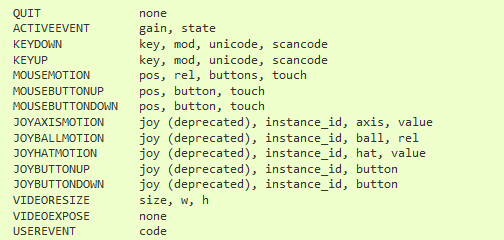

***

## **<span style="color:deepskyblue">Inputs im Event Loop</span>**

In [ ]:
import pygame
import sys

# GAME LOOP
while True:
    # 1. Player Inputs 
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit() 
            sys.exit()
        
        # # # # # Nuuuuuh # # # # # # 
        if event.type == pygame.MOUSEMOTION:
            print(event.pos) # buttons optional

***

## **<span style="color:#fcba04">Code</span> Challenge**

Nutze die Position der Mouse um das Spieler Raumschiff zu steuern.


<div class="alert alert-block alert-success">
<b>Lösung Mouse Position Controls</b>
</div>

In [ ]:
import pygame
import sys
path = "Game Dev Projects/01 Space Shooter/"

pygame.init()
clock = pygame.time.Clock()
WINDOW_WIDTH, WINDOW_HEIGHT = 1280, 720
display = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT))

ship_surface = pygame.image.load(path+"images/player/SmartSpaceShip.png").convert_alpha()
ship_rectangle = ship_surface.get_rect(center = (WINDOW_WIDTH / 2, WINDOW_HEIGHT / 2)) 
background_surface = pygame.image.load(path+"./images/background/background1.png").convert()
font = pygame.font.Font(path+"./fonts/subatomic.ttf", 50)
titel_surface = font.render("Space Boi", True, "White")
titel_rectangle = titel_surface.get_rect(center=(WINDOW_WIDTH / 2, 150))

# GAME LOOP
while True:
    # 1. Player Inputs 
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit() 
            sys.exit()
    
        if event.type == pygame.MOUSEMOTION:
            ship_rectangle.center = event.pos # buttons optional
            
    #Limiting Frame Rate
    clock.tick(60)
    
    # 2. Updates
    display.fill((0, 0, 0))
    display.blit(background_surface, (0, 0))
    display.blit(ship_surface, ship_rectangle)
    display.blit(titel_surface, titel_rectangle)
    
    # 3. Show Frame to Player -> update display_surface
    pygame.display.update()

In [ ]:
if event.type == pygame.MOUSEBUTTONDOWN:
    print(event.pos)

***

## **<span style="color:deepskyblue">Pygame Mouse</span>**

[Pygame Docs Mouse](https://www.pygame.org/docs/ref/mouse.html)

In [ ]:
# GAME LOOP
while True:
    # 1. Player Inputs 
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit() 
            sys.exit()
            # Inputs wieder raus aus dem Event Loop
    #Limiting Frame Rate
    clock.tick(60)
    
    # >>>>>>>> Actual Inputs here <<<<<<<<
    print(pygame.Mouse.get_pos())
    print(pygame.Mouse.get_pressed())
    
    # 2. Updates
    display.fill((0, 0, 0))
    display.blit(background_surface, (0, 0))
    display.blit(ship_surface, ship_rectangle)
    display.blit(titel_surface, titel_rectangle)
    
    # 3. Show Frame to Player -> update display_surface
    pygame.display.update()

***

## **<span style="color:#fcba04">Code</span> Challenge**

Nutze die Position der Mouse mit *pygame.Mouse.get_pos()* um das Spieler Raumschiff zu steuern.

<div class="alert alert-block alert-success">
<b>Lösung Mouse Position Controls 2</b>
</div>

In [ ]:
# >>>>>>>> Actual Inputs here <<<<<<<<
ship_rectangle.center = pygame.Mouse.get_pos()

***

## **True <span style="color:#fcba04">Code</span> Challenge**

Wir wollen mit Controller zocken 🎮😏🤌🏽

[Pygame Docs Controller](https://www.pygame.org/docs/ref/sdl2_controller.html#module-pygame._sdl2.controller)

<div class="alert alert-block alert-success">
<b>Lösung GamePads und Joysticks</b>
</div>

In [ ]:
# Get Gamepads and Joysticks here
pygame.joystick.init()
joysticks = [pygame.joystick.Joystick(i) for i in range(pygame.joystick.get_count())]

# für das Spieler Objekt vlt folgende Methode rein
def move(x_speed, y_speed):
    ship_rectangle.move_ip((x_speed, y_speed))

# >>>>>>>> Actual Inputs here <<<<<<<<
if event.type == pygame.JOYBUTTONDOWN:
    if pygame.joystick.Joystick(0).get_button(0): # X Button
        pass

# Analog Stick
x_speed = round(pygame.joystick.Joystick(0).get_axis(0))
y_speed = round(pygame.joystick.Joystick(0).get_axis(4))
move(x_speed, y_speed)

***

## **<span style="color:deepskyblue">Normalisieren</span>**

die Move Funktion sorgt für eine erhöhte Geschwindigkeit beim Steuern in eine diagonale Richtung.\
Doch der Bre ChatGPT rettet den Tag:

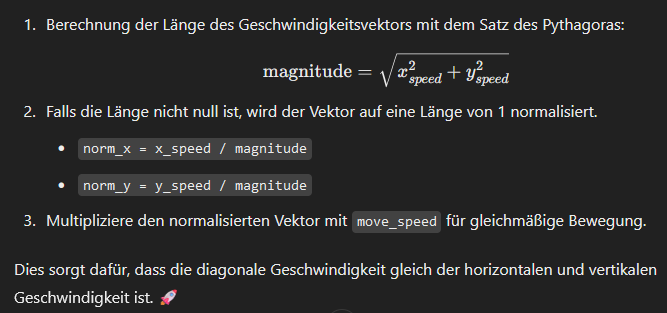


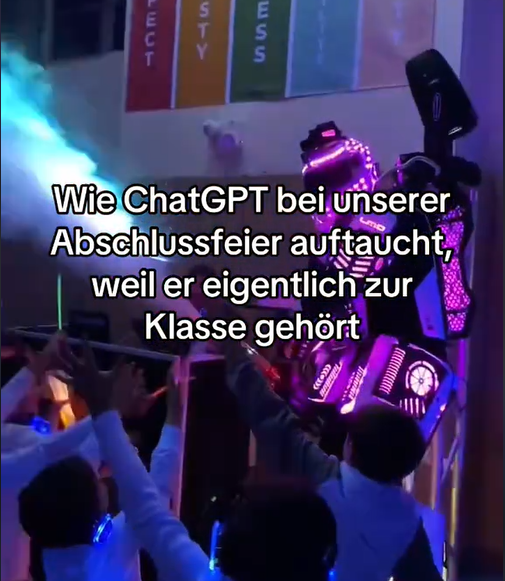

In [ ]:
# wir gehen später noch einmal auf das Normalisieren ein und finden hier eine noch sauberere Lösung

def move(x_speed, y_speed):
    magnitude = math.sqrt(x_speed ** 2 + y_speed ** 2)
    
    if magnitude != 0:
        normalized_x = x_speed / magnitude
        normalized_y = y_speed / magnitude
    else:
        normalized_x, normalized_y = 0, 0
    
    ship_rectangle.move_ip(normalized_x * move_speed, normalized_y * move_speed)